In [1]:
from google.colab import drive

drive.mount("/content/gdrive") 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd "/content/gdrive/MyDrive/Bloque 2 IA/Estadistica"
!ls

/content/gdrive/MyDrive/Bloque 2 IA/Estadistica
 Apuntes.gdoc   Entregable  'Entregable 2'   us2022q2a.csv   usfirms2022.csv


In [3]:
import plotly.express as px
import pandas as pd
import numpy as np

##Seleccion y limpieza de datos

In [4]:
df1 = pd.read_csv('us2022q2a.csv')
df2 = pd.read_csv('usfirms2022.csv')

Dropeamos columnas que son repetidas en el dataset y no nos son utiles para lo que deseamos

In [5]:
df1 = df1.drop(['fiscalmonth', 'year', 'cto'], axis=1)
df2 = df2.drop(['N', 'Country\nof Origin', 'Type of Asset'], axis=1)

Mergeamos los datos de los dos datasets 

In [106]:
df_merge = df1.merge(df2, left_on='firm', right_on='Ticker')
df_merge.head()

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,originalprice,sharesoutstanding,Ticker,Name,Class,Sector NAICS\nlevel 1,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104.0000,452000.000,A,"Agilent Technologies, Inc",Com,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
1,A,2000q2,2485000.0,1261000.0,1010000.0,0.0,42000.0,0.0,90000.0,7321000.0,...,73.7500,452271.967,A,"Agilent Technologies, Inc",Com,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
2,A,2000q3,2670000.0,1369000.0,1091000.0,0.0,28000.0,0.0,83000.0,7827000.0,...,48.9375,453014.579,A,"Agilent Technologies, Inc",Com,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
3,A,2000q4,3372000.0,1732000.0,1182000.0,0.0,10000.0,0.0,163000.0,8425000.0,...,54.7500,456366.381,A,"Agilent Technologies, Inc",Com,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
4,A,2001q1,2841000.0,1449000.0,1113000.0,0.0,-6000.0,0.0,119000.0,9208000.0,...,30.7300,456769.737,A,"Agilent Technologies, Inc",Com,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124


Dropeamos los servicios que no son industriales

In [7]:
df2_services = df_merge.copy()
df2_services = df2_services.drop(df2_services[(df2_services['Sector NAICS\nlevel 1'] == 'Manufacturing')].index)
df2_services = df2_services.drop(df2_services[(df2_services['Sector NAICS\nlevel 1'] == 'Finance and Insurance')].index)
df2_services = df2_services.drop(df2_services[(df2_services['Sector NAICS\nlevel 1'] == 'Information')].index)
df2_services = df2_services.drop(df2_services[(df2_services['Sector NAICS\nlevel 1'] == 'Retail Trade')].index)
df2_services = df2_services.drop(df2_services[(df2_services['Sector NAICS\nlevel 1'] == 'Mining, Quarrying, and Oil and Gas Extraction')].index)
df2_services = df2_services.drop(df2_services[(df2_services['Sector NAICS\nlevel 1'] == 'Wholesale Trade')].index)
df2_services = df2_services.drop(df2_services[(df2_services['Sector NAICS\nlevel 1'] == 'Utilities')].index)
df2_services = df2_services.drop(df2_services[(df2_services['Sector NAICS\nlevel 1'] == 'Transportation and Warehousing')].index)
df2_services = df2_services.drop(df2_services[(df2_services['Sector NAICS\nlevel 1'] == 'Real Estate and Rental and Leasing')].index)
df2_services = df2_services.drop(df2_services[(df2_services['Sector NAICS\nlevel 1'] == 'Health Care and Social Assistance')].index)
df2_services = df2_services.drop(df2_services[(df2_services['Sector NAICS\nlevel 1'] == 'Construction')].index)
df2_services = df2_services.drop(df2_services[(df2_services['Sector NAICS\nlevel 1'] == 'Arts, Entertainment, and Recreation')].index)
df2_services = df2_services.drop(df2_services[(df2_services['Sector NAICS\nlevel 1'] == '-')].index)
df2_services = df2_services.drop(df2_services[(df2_services['Sector NAICS\nlevel 1'] == 'Agriculture, Forestry, Fishing and Hunting')].index)

Obtenemos las R de cada registro 

In [8]:
df2_services['R'] = np.log(df2_services.groupby(['firm'])['adjprice'].shift(-1)) - np.log(df2_services.groupby(['firm'])['adjprice'].shift(3))

Dropeamos todos los datos, a excepcion de el ultimo cuartil

In [9]:
df_mask = df2_services['q'] == '2022q1'
df3 = df2_services[df_mask]

Dropeamos columnas que no se usaran en los calculos de nuestras variables independientes

In [10]:
df3 = df3.drop(
    [
        'extraincome', 
        'shortdebt', 
        'longdebt', 
        'stockholderequity', 
        'Ticker', 
        'Name', 
        'Class',
        'Exchange / Src',
        'Sector\nEconomatica',
        'Sector NAICS\nlast available',
        'partind'
      ],
       axis=1)

In [107]:
df3.head()

,firm,q,revenue,cogs,sgae,otheropexp,finexp,incometax,totalassets,totalliabilities,...,Sector NAICS\nlevel 1,R,Book,Market,EBIT,NetIncome,EPS,EPSP,OPM,Book_to_Market_ratio
1525,ABM,2022q1,1936200.0,1659600.0,170600.0,0.0,6200.0,24300.0,4504900.0,2849600.0,...,Administrative and Support and Waste Managemen...,-0.008253,1655300.0,3.078651e+06,106000.0,75500.0,1.129072,0.024524,0.054746,0.537670
1702,ABNB,2022q1,1508937.0,362623.0,918116.0,233329.0,1020.0,10706.0,17068442.0,12331026.0,...,Administrative and Support and Waste Managemen...,-0.541818,4737416.0,1.088397e+08,-5131.0,-16857.0,-0.026602,-0.000155,-0.003400,0.043527
2692,ACCD,2022q1,93756.0,43593.0,87109.0,-7134.0,768.0,3862.0,1285529.0,429735.0,...,Administrative and Support and Waste Managemen...,-1.993228,855794.0,1.175789e+06,-29812.0,-34442.0,-0.514379,-0.029293,-0.317974,0.727846
3502,ACM,2022q1,3213658.0,3003706.0,37098.0,73292.0,24173.0,36011.0,11196063.0,8546410.0,...,"Professional, Scientific, and Technical Services",0.033485,2649653.0,1.085654e+07,99562.0,39378.0,0.278599,0.003627,0.030981,0.244061
4402,ACVA,2022q1,103065.0,60888.0,38437.0,32829.0,210.0,240.0,1019344.0,485722.0,...,Administrative and Support and Waste Managemen...,-1.365826,533622.0,2.314308e+06,-29089.0,-29539.0,-0.189030,-0.012764,-0.282239,0.230575


In [12]:
df3['R'].isna().sum()

29

Revisamos las variables con las que obtendremos OPM, book_to_market y EPSP, eliminando los registros nulos y ceros para no entorpecer las operaciones 

In [13]:
df3['revenue'].isna().sum()

5

In [14]:
df3['revenue'].describe()

count    3.720000e+02
mean     9.212180e+05
std      3.942143e+06
min      0.000000e+00
25%      6.649075e+04
50%      1.981825e+05
75%      7.438012e+05
max      6.801100e+07
Name: revenue, dtype: float64

In [15]:
df_mask = df3['revenue'] > 0
df3 = df3[df_mask]

In [16]:
df3['revenue'].isna().sum()

0

In [17]:
df3['sharesoutstanding'].isna().sum()

1

In [18]:
df3['sharesoutstanding'].describe()

count    3.670000e+02
mean     1.407183e+05
std      2.641917e+05
min      1.786296e+03
25%      2.958531e+04
50%      5.722365e+04
75%      1.400198e+05
max      2.721942e+06
Name: sharesoutstanding, dtype: float64

In [19]:
df_mask = df3['sharesoutstanding'] >= 0
df3 = df3[df_mask]

In [20]:
df3['sharesoutstanding'].isna().sum()

0

In [21]:
df3['originalprice'].isna().sum()

1

In [22]:
df3['originalprice'].describe()

count     366.000000
mean       75.408607
std       217.109625
min         0.260000
25%        10.522500
50%        29.585000
75%        77.442500
max      2781.350000
Name: originalprice, dtype: float64

In [23]:
df_mask = df3['originalprice'] >= 0
df3 = df3[df_mask]

In [24]:
df3['originalprice'].isna().sum()

0

Calculamos Book to market ratio, epsp y opm a partir de los datos

In [25]:
df3['Book'] = df3['totalassets'] - df3['totalliabilities']
df3['Market'] = df3['originalprice'] * df3['sharesoutstanding']


df3['EBIT'] = df3['revenue'] - df3['cogs'] - df3['sgae'] - df3['otheropexp']
df3['NetIncome'] = df3['EBIT'] - df3['incometax'] - df3['finexp']
df3['EPS'] = df3['NetIncome'] / df3['sharesoutstanding']


df3['EPSP'] = df3['EPS'] / df3['originalprice']
df3['OPM'] = df3['EBIT'] / df3['revenue']
df3['Book_to_Market_ratio'] = df3['Book'] / df3['Market']

Dropeamos los nan en las variables de R, OPM, EPSP Y Book_to_Market_ratio

In [26]:
df3['R'].isna().sum()

23

In [27]:
df3['R'].describe()

count    343.000000
mean      -0.496691
std        0.638242
min       -3.482115
25%       -0.774205
50%       -0.320379
75%       -0.079993
max        1.591808
Name: R, dtype: float64

In [28]:
df_mask = df3['R'] >= -5
df3 = df3[df_mask]

In [29]:
df3['R'].isna().sum()

0

In [30]:
df3['EPSP'].isna().sum()

0

In [31]:
df3['Book_to_Market_ratio'].isna().sum()

0

In [32]:
df3['OPM'].isna().sum()

0

In [33]:
df_clean_3 = df3.copy()

Sorteamos los datos por mercado

In [34]:
df_clean_3 = df_clean_3.sort_values(by = 'Market')

In [35]:
df_clean_3 = df_clean_3.reset_index()
df_clean_3 = df_clean_3.drop(['index'], axis = 1)

In [36]:
df_clean_3 = df_clean_3.reset_index()

Asignamos las varuables dummys para obtener las grandes, medianas y grandes empresas

In [37]:
df_clean_3["isSmall"] = df_clean_3.index <= len(df_clean_3) / 3
df_clean_3["isSmall"] = df_clean_3["isSmall"].astype(int)

df_clean_3["isMedium"] = (df_clean_3.index <= (2 * len(df_clean_3) / 3)) & (df_clean_3.index > (len(df_clean_3) / 3))
df_clean_3["isMedium"] = df_clean_3["isMedium"].astype(int)

Guardamos las variables que usaremos para el calculo matricial

In [38]:
Variables = df_clean_3[['EPSP', 'OPM', 'Book_to_Market_ratio', 'isSmall', 'isMedium', 'R']]
Variables_mat = Variables.cov().to_numpy()

Dividimos las variables en 'X' y 'y'

In [39]:
X = df_clean_3[['EPSP', 'OPM', 'Book_to_Market_ratio', 'isSmall', 'isMedium']]
y = df_clean_3['R']

##Matriz de varianza y covarianza

Seguimos las formula del documento https://docs.google.com/viewer?a=v&pid=sites&srcid=ZWdhZGVyemMubmV0fGZ6MzAzMHxneDozOTI1ODBmMGU2YTMzZGM1

Para obtener la matriz de varianza y covarianza

In [40]:
X_varcov_mat = X.to_numpy()

In [41]:
X_varcov_trans = np.transpose(X_varcov_mat)

In [42]:
aux1 = np.dot(X_varcov_trans, X_varcov_mat)

In [43]:
unos = np.zeros((X_varcov_trans.shape[1], 1))

In [44]:
unos = 1 + unos

In [45]:
aux2 = np.dot(X_varcov_trans, unos)

In [46]:
aux3 = np.transpose(aux2)

In [47]:
aux4 = np.dot(aux2, aux3)

In [48]:
aux5 = aux4 / X_varcov_mat.shape[0]

In [49]:
aux6 = aux1 - aux5

In [50]:
mat_varcov = aux6 / (X_varcov_mat.shape[0] - 1)

In [51]:
mat_varcov

array([[ 8.10117893e-03,  9.44989090e-02, -5.59550077e-03,
        -1.22051289e-02,  5.27735695e-03],
       [ 9.44989090e-02,  2.66685817e+02,  3.75584007e-02,
         8.71823279e-02, -5.58580184e-01],
       [-5.59550077e-03,  3.75584007e-02,  2.60931238e-01,
         8.65885609e-02, -2.45076743e-02],
       [-1.22051289e-02,  8.71823279e-02,  8.65885609e-02,
         2.23517979e-01, -1.11758989e-01],
       [ 5.27735695e-03, -5.58580184e-01, -2.45076743e-02,
        -1.11758989e-01,  2.22546161e-01]])

In [52]:
mat = pd.DataFrame(mat_varcov)

In [53]:
mat

,0,1,2,3,4
0,0.008101,0.094499,-0.005596,-0.012205,0.005277
1,0.094499,266.685817,0.037558,0.087182,-0.558580
2,-0.005596,0.037558,0.260931,0.086589,-0.024508
3,-0.012205,0.087182,0.086589,0.223518,-0.111759
4,0.005277,-0.558580,-0.024508,-0.111759,0.222546


Comprobacion de la matriz de varianza y covarianza

In [54]:
X.cov()

,EPSP,OPM,Book_to_Market_ratio,isSmall,isMedium
EPSP,0.008101,0.094499,-0.005596,-0.012205,0.005277
OPM,0.094499,266.685817,0.037558,0.087182,-0.558580
Book_to_Market_ratio,-0.005596,0.037558,0.260931,0.086589,-0.024508
isSmall,-0.012205,0.087182,0.086589,0.223518,-0.111759
isMedium,0.005277,-0.558580,-0.024508,-0.111759,0.222546


Comprobamos que las varianzas son iguales en nuestro calculo y lo obtenido por medio de pandas, por lo que la matriz es correcta

##Matriz de correlaciones


Seguimos la formula de correlacion obtenida a base de los standar deviations y la matriz de varianza y covarianza

In [55]:
var = np.diagonal(mat_varcov)

In [56]:
stdr_dev = np.sqrt(var)

In [57]:
stdr_dev

array([ 0.09000655, 16.33051797,  0.51081429,  0.47277688,  0.47174798])

In [58]:
ya_no_se = [[ 0 for y in range( len(stdr_dev) ) ] for x in range( len(stdr_dev) )]
for i in range(len(stdr_dev)):
  for j in range(len(stdr_dev)):
    ya_no_se[i][j] = stdr_dev[i] * stdr_dev[j]

In [59]:
corr = [[ 0 for y in range( len(ya_no_se) ) ] for x in range( len(ya_no_se) )]
for i in range(len(ya_no_se)):
  for j in range(len(ya_no_se)):
    corr[i][j] = mat_varcov[i][j] / ya_no_se[i][j]

In [108]:
print(corr)

[[1.0, 0.06429137624010672, -0.12170314747329583, -0.28682171558280145, 0.1242888885114298], [0.06429137624010672, 1.0000000000000002, 0.004502400179255902, 0.01129203642553, -0.07250626113564698], [-0.12170314747329583, 0.004502400179255902, 1.0, 0.35854300441971737, -0.1017018865114624], [-0.28682171558280145, 0.01129203642553, 0.35854300441971737, 1.0000000000000002, -0.5010905138363413], [0.1242888885114298, -0.07250626113564698, -0.1017018865114624, -0.5010905138363413, 1.0000000000000002]]


In [61]:
X.corr()

,EPSP,OPM,Book_to_Market_ratio,isSmall,isMedium
EPSP,1.000000,0.064291,-0.121703,-0.286822,0.124289
OPM,0.064291,1.000000,0.004502,0.011292,-0.072506
Book_to_Market_ratio,-0.121703,0.004502,1.000000,0.358543,-0.101702
isSmall,-0.286822,0.011292,0.358543,1.000000,-0.501091
isMedium,0.124289,-0.072506,-0.101702,-0.501091,1.000000


Comprobamos que las correlaciones son iguales en nuestro calculo y lo obtenido por medio de pandas, por lo que la matriz es correcta

###Interpretacion de las correlaciones

Segun lo obtenido en la matriz de correlacion, podemos ver que las variables con mayor relacion entre ellas son la de isSmall con EPSP de manera negativa, isSmall con Book to Market de forma positiva e isMedium con isSmall de forma negativa. 

#Modelo 1

###Betas

Seguimos la siguiente formula para obtener las betas 

Primer valor de x son 1

x´ es x transpuesta

x^1 es x inversa

(x´x)^-1x´y

In [62]:
X['1'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
X = X[['1', 'isSmall', 'isMedium', 'EPSP', 'OPM', 'Book_to_Market_ratio']]

In [64]:
X_mat = X.to_numpy()

In [65]:
X_t = np.transpose(X_mat)

In [66]:
X_sqr = np.dot(X_t, X_mat)

In [67]:
X_inv = np.linalg.inv(X_sqr)

In [68]:
aux = np.dot(X_inv, X_t)

###Hat matrix

Para obtener la hat matrix, seguiremos la formula de:

H = X(X´X)^-1X´

In [69]:
hat_mat = np.dot(X_mat, aux)

In [70]:
print(hat_mat)

array([[ 7.99814542e-02,  3.69566482e-02,  3.64933116e-02, ...,
        -3.12175062e-03,  3.86339056e-04, -1.53510011e-03],
       [ 3.69566482e-02,  2.11714623e-02,  2.10072578e-02, ...,
        -1.23457873e-03,  1.55939187e-05, -6.59032828e-04],
       [ 3.64933116e-02,  2.10072578e-02,  2.08512576e-02, ...,
        -1.21840798e-03,  9.30848046e-06, -6.51292207e-04],
       ...,
       [-3.12175062e-03, -1.23457873e-03, -1.21840798e-03, ...,
         8.91219115e-03,  8.75610265e-03,  8.84028130e-03],
       [ 3.86339056e-04,  1.55939187e-05,  9.30848046e-06, ...,
         8.75610265e-03,  8.78947148e-03,  8.76956564e-03],
       [-1.53510011e-03, -6.59032828e-04, -6.51292207e-04, ...,
         8.84028130e-03,  8.76956564e-03,  8.80742646e-03]])

In [71]:
hat_mat_pd = pd.DataFrame(hat_mat)

In [72]:
hat_mat_pd

,0,1,2,3,4,5,6,7,8,9,...,333,334,335,336,337,338,339,340,341,342
0,0.079981,0.036957,0.036493,0.005703,0.012052,0.029782,0.024680,-0.006519,0.015075,0.019901,...,-0.004172,0.006343,-0.008143,-0.004171,-0.000980,-0.006656,-0.005036,-0.003122,0.000386,-0.001535
1,0.036957,0.021171,0.021007,0.009232,0.008866,0.016961,0.018605,0.001757,0.009248,0.015641,...,-0.001498,0.002238,-0.003076,-0.001435,-0.000336,-0.002563,-0.001930,-0.001235,0.000016,-0.000659
2,0.036493,0.021007,0.020851,0.009279,0.008815,0.016819,0.018585,0.001829,0.009162,0.015634,...,-0.001467,0.002187,-0.003021,-0.001403,-0.000328,-0.002521,-0.001900,-0.001218,0.000009,-0.000651
3,0.005703,0.009232,0.009279,0.011155,0.006981,0.007682,0.012869,0.008103,0.005748,0.011620,...,0.000387,-0.000642,0.000548,0.000472,0.000113,0.000381,0.000301,0.000134,-0.000203,-0.000004
4,0.012052,0.008866,0.008815,0.006981,0.009939,0.009782,0.006122,0.008836,0.010833,0.006876,...,-0.000341,0.000563,-0.000522,-0.000399,-0.000095,-0.000377,-0.000290,-0.000140,0.000148,-0.000023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,-0.006656,-0.002563,-0.002521,0.000381,-0.000377,-0.001973,-0.001294,0.001372,-0.000706,-0.000911,...,0.009170,0.008166,0.009541,0.009174,0.008866,0.009399,0.009248,0.009066,0.008728,0.008913
339,-0.005036,-0.001930,-0.001900,0.000301,-0.000290,-0.001492,-0.000962,0.001036,-0.000544,-0.000680,...,0.009074,0.008313,0.009355,0.009077,0.008844,0.009248,0.009134,0.008996,0.008739,0.008879
340,-0.003122,-0.001235,-0.001218,0.000134,-0.000140,-0.000921,-0.000716,0.000675,-0.000272,-0.000508,...,0.008954,0.008498,0.009129,0.008954,0.008815,0.009066,0.008996,0.008912,0.008756,0.008840
341,0.000386,0.000016,0.000009,-0.000203,0.000148,0.000126,-0.000310,0.000020,0.000253,-0.000219,...,0.008732,0.008838,0.008711,0.008725,0.008761,0.008728,0.008739,0.008756,0.008789,0.008770


Para conocer los leverage points de los datos, obtenemos la diagonal de nuestra Hat matrix

In [73]:
lp = np.diag(hat_mat_pd)

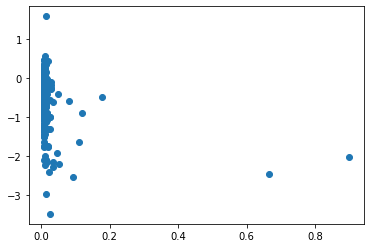

In [74]:
import matplotlib.pyplot as plt
plt.scatter(lp, y)

In [75]:
lp_df = pd.DataFrame(lp, columns = ['leverage_points'])

In [76]:
lp_df.describe()

,leverage_points
count,343.000000
mean,0.017493
std,0.060969
min,0.008723
25%,0.009009
50%,0.009527
75%,0.011539
max,0.897466


Una vez obtenidos los leverage points, podemos ver en la grafica, que tenemos algunos con valores altos,(las que se encuentran por encima de 0.6), de igual forma, podemos ver que estos son leverage points altos, ya que la media de los datos es de 0.17, por lo que se encuentran muy separados.

De igual forma, podemos seguir la formula *(3k+3)/n*, con la cual obtenemos 3 veces el valor de la media de los leverage points, y los valores por encima de estos se consideran altos.

Datos a tomar:
* k = number of predictors (5)
* n = number of observations (343)

((3*5)+3)/343 = 0.0524781341107 => cualquier número por encima de este es un high leverage.

Dropearemos todos los datos por encima de esto.

In [77]:
mask = lp_df['leverage_points'] <= 0.0524781341107
lp_df = lp_df[mask]

In [78]:
lp_df.describe()

,leverage_points
count,336.000000
mean,0.011478
std,0.005558
min,0.008723
25%,0.009003
50%,0.009512
75%,0.011380
max,0.050592


Podemos ver que se eliminaron 7 registros, y una vez eliminados estos datos, vemos que ya no hay datos por encima del valor dicho



Finalmente obtenemos los valores de las Betas con outliers del primer modelo 

In [79]:
B = np.dot(aux, y)

In [80]:
print(B)

[-0.32709095 -0.19304263 -0.10909288  3.15241522  0.00727031 -0.03304624]


###MSE

In [81]:
y_pred = X * B

In [82]:
y_pred['sum'] = y_pred['1'] + y_pred['isSmall'] + y_pred['isMedium'] + y_pred['EPSP'] + y_pred['OPM'] + y_pred['Book_to_Market_ratio']

In [83]:
E = y - y_pred['sum']

In [84]:
aux = E * E

In [85]:
print(aux)

0      0.151943
1      0.619076
2      0.088342
3      1.662498
4      0.089718
         ...   
338    0.147653
339    0.025062
340    0.017362
341    0.224387
342    0.034444
Length: 343, dtype: float64


In [86]:
MSE = aux.sum()/len(aux)

In [87]:
print(MSE)

0.28707952963553085


###Multicolinealidad

Revisamos la multicolinearidad de las variables usando la funcion de VIF

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                feature       VIF
0                     1  3.169416
1               isSmall  1.623790
2              isMedium  1.356360
3                  EPSP  1.095860
4                   OPM  1.011020
5  Book_to_Market_ratio  1.158820


Como podemos ver, al tener un vif de menos de 1.5 en todas las variables, no existe multicolienaridad en los datos, por lo que no se necesita generar cambios en estos

##Modelo base

In [89]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [90]:
mod = sm.OLS(y, sm.add_constant(X)).fit()

print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     27.96
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           1.09e-23
Time:                        00:39:10   Log-Likelihood:                -272.66
No. Observations:                 343   AIC:                             557.3
Df Residuals:                     337   BIC:                             580.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
1                       -0.3271 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###Leverage Points y Outliers

In [91]:
influence = mod.get_influence()
inf_sum = influence.summary_frame()

print(inf_sum.head())

student_resid = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

      dfb_1  dfb_isSmall  dfb_isMedium  dfb_EPSP   dfb_OPM  \
0 -0.044687    -0.031668     -0.020327 -0.027360  0.002654   
1  0.029940    -0.019770      0.015261  0.073203 -0.008763   
2  0.011037    -0.007701      0.005749  0.027817 -0.002096   
3 -0.014111    -0.133038     -0.002716  0.112631 -0.013666   
4 -0.002805     0.034266     -0.000482  0.017255  0.000608   

   dfb_Book_to_Market_ratio   cooks_d  standard_resid  hat_diag  \
0                  0.206752  0.008190        0.751811  0.079981   
1                 -0.147880  0.007803       -1.471246  0.021171   
2                 -0.054685  0.001096       -0.555683  0.020851   
3                  0.044585  0.010818       -2.398740  0.011155   
4                  0.009680  0.000519        0.556899  0.009939   

   dffits_internal  student_resid    dffits  
0         0.221669       0.751325  0.221526  
1        -0.216375      -1.473802 -0.216751  
2        -0.081090      -0.555112 -0.081007  
3        -0.254769      -2.415891 -0.256

In [92]:
# Concatenación con la variable dependiente y (R)
from statsmodels.formula.api import ols

ym = pd.DataFrame(y)
y_dep = pd.concat([ym.R, inf_sum], axis = 1)
y_dep =y_dep.rename(columns={'hat_diag': 'leverage'})
y_dep.head()

,R,dfb_1,dfb_isSmall,dfb_isMedium,dfb_EPSP,dfb_OPM,dfb_Book_to_Market_ratio,cooks_d,standard_resid,leverage,dffits_internal,student_resid,dffits
0,-0.589921,-0.044687,-0.031668,-0.020327,-0.027360,0.002654,0.206752,0.008190,0.751811,0.079981,0.221669,0.751325,0.221526
1,-1.773474,0.029940,-0.019770,0.015261,0.073203,-0.008763,-0.147880,0.007803,-1.471246,0.021171,-0.216375,-1.473802,-0.216751
2,-1.290984,0.011037,-0.007701,0.005749,0.027817,-0.002096,-0.054685,0.001096,-0.555683,0.020851,-0.081090,-0.555112,-0.081007
3,-2.218991,-0.014111,-0.133038,-0.002716,0.112631,-0.013666,0.044585,0.010818,-2.398740,0.011155,-0.254769,-2.415891,-0.256591
4,-0.253549,-0.002805,0.034266,-0.000482,0.017255,0.000608,0.009680,0.000519,0.556899,0.009939,0.055797,0.556328,0.055740


En esta tabla, podemos ver el student residual, los cooks distances, los drifts y los leverage points de nuestros datos

Leverage vs. Studentized Residuals


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Studentized Residuals')

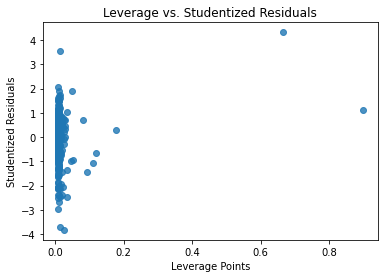

In [93]:
import seaborn as sns

print ('Leverage vs. Studentized Residuals')
sns.regplot(leverage, mod.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage Points')
plt.ylabel('Studentized Residuals')

Podemos comprobar que los leverage points obtenidos con algebra matricial son los mismos que los obtenidos con las funciones de python

###Studentized residuals y High Leverage Points

Al igual que en los leverage points calculados con algebra matricial, se tomaran como high leverage points los que se sean mayores a tres veces el valor absoluto 

In [94]:
r = y_dep.student_resid
print (' student residual ')
print (r.describe())

 student residual 
count    343.000000
mean       0.016685
std        1.087878
min       -3.966665
25%       -0.510928
50%        0.163034
75%        0.621224
max        8.179974
Name: student_resid, dtype: float64


Podemos ver que existen valores mayores al valor absouto de 3, por lo que consideraremos estos como outiers

In [95]:
print(y_dep.student_resid[abs(r) > 3])

24     8.179974
41     3.650426
53    -3.807500
77    -3.966665
170   -3.027921
190    3.587238
Name: student_resid, dtype: float64


In [96]:
# High leverage
# point with leverage = (3k+3)/n 
# k = number of predictors (5)
# n = number of observations (343)
#((3*3)+2)/343 = 0.0524781341107 => cualquier número por encima de este es un high leverage
l = y_dep.leverage

print (l.describe())

count    343.000000
mean       0.017493
std        0.060969
min        0.008723
25%        0.009009
50%        0.009527
75%        0.011539
max        0.897466
Name: leverage, dtype: float64


Podemos ver que existen valores por encima del marcado (0.0524), que son los high leverage point 

In [97]:
# Leverage Point = ((3*3)+2)/343 = 0.0524781341107
print(y_dep.leverage[abs(l) > ((3*5)+3)/343])

0      0.079981
10     0.092529
23     0.177603
24     0.665677
64     0.110614
143    0.119640
190    0.897466
Name: leverage, dtype: float64


Con este filtro, podemos ver que hay 7 high leverage points en nuestros datos

Debido a esto, ahora sabemos que hay datos con gran influenci, ya que tenemos tanto outliers como high leverage, lo que puede afectar a los coeficientes

In [98]:
# Valores que son outliers y high leverage
outlier = pd.DataFrame((y_dep.R[abs(r) > 3]))
leverage= pd.DataFrame((y_dep.R[abs(l) > ((3*5)+3)/343]))

Influential=pd.merge(outlier,leverage, left_index=True, right_index=True)
print(Influential)

          R_x       R_y
24  -2.455893 -2.455893
190 -2.033554 -2.033554


Estos serian los valores mas influentes, ya que son tanto high leevrage como outliers

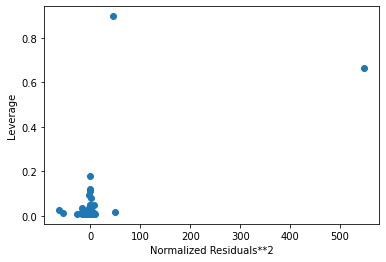

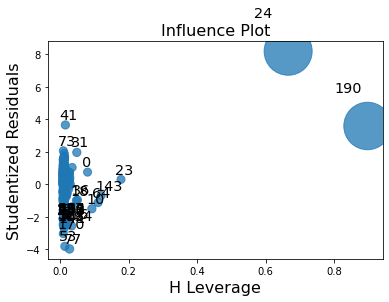

In [99]:
from statsmodels.graphics.regressionplots import *

plt.scatter(y_dep.student_resid ** 3, y_dep.leverage)
plt.xlabel("Normalized Residuals**2")
plt.ylabel("Leverage")
plt.show()

influence_plot(mod)
plt.show()

Revisamos con los registros anteriores los cuales son:
* 0.665677 Y 0.897466 DE LEVERAGE RESPECTIVAMENTE
* 8.179974 Y 3.587238 DE STUDENTIZED RESIDUAL 

Podemos decir aahora que estos dos son los datos con mayor influencia en el modelo.

###Cooks distance

En este caso, igual tomaremos el triple de la media paa obtener los outlierspor medio del metodo de cooks

In [100]:
limit = (y_dep.loc[:,"cooks_d"].mean())*3
outlier2 = pd.DataFrame((y_dep.R[abs(y_dep.cooks_d) > limit]))
print(outlier2)

            R
24  -2.455893
190 -2.033554


Podemos ver que al igual que en los otros metodos, nuestros outliers son los mismos

##Modelo 2

Al ya conocer los outliers, high leverage y valores influenciables denro de nuestros datos, podemos mejorar el modelo descartando estos 

In [101]:
X_m2 = X.copy()
Y_m2 = ym.copy()

X_m2 = X_m2.drop([24, 41, 53, 77, 170, 190])
Y_m2 = Y_m2.drop([24, 41, 53, 77, 170, 190])

Obtencion de las bbetas con algebra matricial

In [102]:
X = X_m2[['1', 'isSmall', 'isMedium', 'EPSP', 'OPM', 'Book_to_Market_ratio']]
X_mat = X.to_numpy()
X_t = np.transpose(X_mat)
X_sqr = np.dot(X_t, X_mat)
X_inv = np.linalg.inv(X_sqr)
aux = np.dot(X_inv, X_t)
B = np.dot(aux, Y_m2)
print(B)

[[-0.33855748]
 [-0.06022982]
 [-0.07929252]
 [ 5.67505071]
 [ 0.01853454]
 [-0.05935155]]


In [103]:
model2 = sm.OLS(Y_m2, sm.add_constant(X_m2)).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     37.72
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           1.40e-30
Time:                        00:39:11   Log-Likelihood:                -215.01
No. Observations:                 337   AIC:                             442.0
Df Residuals:                     331   BIC:                             464.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
1                       -0.3386 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Podemos ver que con este cambio, pasamos de tener una r^2 de 0.293 a 0.363.

Con esto podemos observar como los outliers y valores influenciables afectan a nuestro modelo, ya que al eliminar estos tuvimos una mejoria en nuestro modelo

##Referencias

* and. (2019, October 21). DataSklr. DataSklr. https://www.datasklr.com/ols-least-squares-regression/diagnostics-for-leverage-and-influence

‌